In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read insulin data
InsulinData = pd.read_csv("dataset/InsulinData_Patient1.csv")

# Generate combined Date-Time stamp
InsulinData["combinedStamp"] = pd.to_datetime(InsulinData["Date"] + ' - ' + InsulinData["Time"])

# Get the TimeStamp where AUTO mode starts
# [Pump always starts in MANUAL mode] 
autoPoint = InsulinData.sort_values(by = ["combinedStamp"]).loc[InsulinData["Alarm"] == "AUTO MODE ACTIVE PLGM OFF"].iloc[0]["combinedStamp"]

C:\Users\gaura\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Read CGM data
CGMData = pd.read_csv("CGMData_Patient1.csv")

# Generate combined Date-Time stamp
CGMData["combinedStamp"] = pd.to_datetime(CGMData["Date"] + ' - ' + CGMData["Time"])

C:\Users\gaura\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Extract data in AUTO mode
auto = CGMData.sort_values(by = ["combinedStamp"]).loc[CGMData["combinedStamp"] > autoPoint]

# Extract data in MANUAL mode
manual = CGMData.sort_values(by = ["combinedStamp"]).loc[CGMData["combinedStamp"] <= autoPoint]

In [5]:
# Extract unique dates in both modes

autoDates = pd.unique(auto["combinedStamp"].dt.date)

manualDates = pd.unique(manual["combinedStamp"].dt.date)

In [6]:
whole_count_1 = 0
whole_count_2 = 0
whole_count_3 = 0
whole_count_4 = 0
whole_count_5 = 0
whole_count_6 = 0

In [7]:
day_count_1 = 0
day_count_2 = 0
day_count_3 = 0
day_count_4 = 0
day_count_5 = 0
day_count_6 = 0

In [8]:
night_count_1 = 0
night_count_2 = 0
night_count_3 = 0
night_count_4 = 0
night_count_5 = 0
night_count_6 = 0

In [9]:
# Analyzing data in AUTO mode

for item in autoDates:
    
    # Segregate data according to given 3 given time intervals 
    whole = auto.loc[auto["combinedStamp"].dt.date == item]
    day = whole.loc[(whole["combinedStamp"].dt.time >= pd.to_datetime('06:00:00').time()) & (whole["combinedStamp"].dt.time <= pd.to_datetime('23:59:59').time())]
    night = whole.loc[(whole["combinedStamp"].dt.time >= pd.to_datetime('00:00:00').time()) & (whole["combinedStamp"].dt.time < pd.to_datetime('06:00:00').time())]
    
    # Calculate asked metrics
    temp = whole[whole["Sensor Glucose (mg/dL)"] > 180]
    whole_count_1 = whole_count_1 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[whole["Sensor Glucose (mg/dL)"] > 250]
    whole_count_2 = whole_count_2 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[(whole["Sensor Glucose (mg/dL)"] >= 70) & (whole["Sensor Glucose (mg/dL)"] <= 180)]
    whole_count_3 = whole_count_3 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[(whole["Sensor Glucose (mg/dL)"] >= 70) & (whole["Sensor Glucose (mg/dL)"] <= 150)]
    whole_count_4 = whole_count_4 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[whole["Sensor Glucose (mg/dL)"] < 70]
    whole_count_5 = whole_count_5 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[whole["Sensor Glucose (mg/dL)"] < 54]
    whole_count_6 = whole_count_6 + temp["Sensor Glucose (mg/dL)"].count()
    
    
    temp = day[day["Sensor Glucose (mg/dL)"] > 180]
    day_count_1 = day_count_1 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[day["Sensor Glucose (mg/dL)"] > 250]
    day_count_2 = day_count_2 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[(day["Sensor Glucose (mg/dL)"] >= 70) & (day["Sensor Glucose (mg/dL)"] <= 180)]
    day_count_3 = day_count_3 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[(day["Sensor Glucose (mg/dL)"] >= 70) & (day["Sensor Glucose (mg/dL)"] <= 150)]
    day_count_4 = day_count_4 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[day["Sensor Glucose (mg/dL)"] < 70]
    day_count_5 = day_count_5 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[day["Sensor Glucose (mg/dL)"] < 54]
    day_count_6 = day_count_6 + temp["Sensor Glucose (mg/dL)"].count()
    
    
    temp = night[night["Sensor Glucose (mg/dL)"] > 180]
    night_count_1 = night_count_1 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[night["Sensor Glucose (mg/dL)"] > 250]
    night_count_2 = night_count_2 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[(night["Sensor Glucose (mg/dL)"] >= 70) & (night["Sensor Glucose (mg/dL)"] <= 180)]
    night_count_3 = night_count_3 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[(night["Sensor Glucose (mg/dL)"] >= 70) & (night["Sensor Glucose (mg/dL)"] <= 150)]
    night_count_4 = night_count_4 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[night["Sensor Glucose (mg/dL)"] < 70]
    night_count_5 = night_count_5 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[night["Sensor Glucose (mg/dL)"] < 54]
    night_count_6 = night_count_6 + temp["Sensor Glucose (mg/dL)"].count()

In [10]:
# Convert calculated figures to metrics percentages

percentage_factor_whole = len(autoDates) * 288
percentage_factor_day = percentage_factor_whole * 0.75
percentage_factor_night = percentage_factor_whole * 0.25

auto_percentage_whole_1 = (whole_count_1/percentage_factor_whole) * 100
auto_percentage_whole_2 = (whole_count_2/percentage_factor_whole) * 100
auto_percentage_whole_3 = (whole_count_3/percentage_factor_whole) * 100
auto_percentage_whole_4 = (whole_count_4/percentage_factor_whole) * 100
auto_percentage_whole_5 = (whole_count_5/percentage_factor_whole) * 100
auto_percentage_whole_6 = (whole_count_6/percentage_factor_whole) * 100

auto_percentage_day_1 = (day_count_1/percentage_factor_day) * 100
auto_percentage_day_2 = (day_count_2/percentage_factor_day) * 100
auto_percentage_day_3 = (day_count_3/percentage_factor_day) * 100
auto_percentage_day_4 = (day_count_4/percentage_factor_day) * 100
auto_percentage_day_5 = (day_count_5/percentage_factor_day) * 100
auto_percentage_day_6 = (day_count_6/percentage_factor_day) * 100

auto_percentage_night_1 = (night_count_1/percentage_factor_night) * 100
auto_percentage_night_2 = (night_count_2/percentage_factor_night) * 100
auto_percentage_night_3 = (night_count_3/percentage_factor_night) * 100
auto_percentage_night_4 = (night_count_4/percentage_factor_night) * 100
auto_percentage_night_5 = (night_count_5/percentage_factor_night) * 100
auto_percentage_night_6 = (night_count_6/percentage_factor_night) * 100

In [11]:
whole_count_1 = 0
whole_count_2 = 0
whole_count_3 = 0
whole_count_4 = 0
whole_count_5 = 0
whole_count_6 = 0

In [12]:
day_count_1 = 0
day_count_2 = 0
day_count_3 = 0
day_count_4 = 0
day_count_5 = 0
day_count_6 = 0

In [13]:
night_count_1 = 0
night_count_2 = 0
night_count_3 = 0
night_count_4 = 0
night_count_5 = 0
night_count_6 = 0

In [14]:
# Analyzing data in AUTO mode

for item in manualDates:
    
    # Segregate data according to given 3 given time intervals
    whole = manual.loc[manual["combinedStamp"].dt.date == item]
    day = whole.loc[(whole["combinedStamp"].dt.time >= pd.to_datetime('06:00:00').time()) & (whole["combinedStamp"].dt.time <= pd.to_datetime('23:59:59').time())]
    night = whole.loc[(whole["combinedStamp"].dt.time >= pd.to_datetime('00:00:00').time()) & (whole["combinedStamp"].dt.time < pd.to_datetime('06:00:00').time())]
    
    # Calculate asked metrics
    temp = whole[whole["Sensor Glucose (mg/dL)"] > 180]
    whole_count_1 = whole_count_1 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[whole["Sensor Glucose (mg/dL)"] > 250]
    whole_count_2 = whole_count_2 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[(whole["Sensor Glucose (mg/dL)"] >= 70) & (whole["Sensor Glucose (mg/dL)"] <= 180)]
    whole_count_3 = whole_count_3 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[(whole["Sensor Glucose (mg/dL)"] >= 70) & (whole["Sensor Glucose (mg/dL)"] <= 150)]
    whole_count_4 = whole_count_4 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[whole["Sensor Glucose (mg/dL)"] < 70]
    whole_count_5 = whole_count_5 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = whole[whole["Sensor Glucose (mg/dL)"] < 54]
    whole_count_6 = whole_count_6 + temp["Sensor Glucose (mg/dL)"].count()
    
    
    temp = day[day["Sensor Glucose (mg/dL)"] > 180]
    day_count_1 = day_count_1 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[day["Sensor Glucose (mg/dL)"] > 250]
    day_count_2 = day_count_2 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[(day["Sensor Glucose (mg/dL)"] >= 70) & (day["Sensor Glucose (mg/dL)"] <= 180)]
    day_count_3 = day_count_3 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[(day["Sensor Glucose (mg/dL)"] >= 70) & (day["Sensor Glucose (mg/dL)"] <= 150)]
    day_count_4 = day_count_4 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[day["Sensor Glucose (mg/dL)"] < 70]
    day_count_5 = day_count_5 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = day[day["Sensor Glucose (mg/dL)"] < 54]
    day_count_6 = day_count_6 + temp["Sensor Glucose (mg/dL)"].count()
    
    
    temp = night[night["Sensor Glucose (mg/dL)"] > 180]
    night_count_1 = night_count_1 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[night["Sensor Glucose (mg/dL)"] > 250]
    night_count_2 = night_count_2 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[(night["Sensor Glucose (mg/dL)"] >= 70) & (night["Sensor Glucose (mg/dL)"] <= 180)]
    night_count_3 = night_count_3 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[(night["Sensor Glucose (mg/dL)"] >= 70) & (night["Sensor Glucose (mg/dL)"] <= 150)]
    night_count_4 = night_count_4 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[night["Sensor Glucose (mg/dL)"] < 70]
    night_count_5 = night_count_5 + temp["Sensor Glucose (mg/dL)"].count()
    
    temp = night[night["Sensor Glucose (mg/dL)"] < 54]
    night_count_6 = night_count_6 + temp["Sensor Glucose (mg/dL)"].count()

In [15]:
# Convert calculated figures to metrics percentages

percentage_factor_whole = len(manualDates) * 288
percentage_factor_day = percentage_factor_whole / 0.75
percentage_factor_night = percentage_factor_whole / 0.25

manual_percentage_whole_1 = (whole_count_1/percentage_factor_whole) * 100
manual_percentage_whole_2 = (whole_count_2/percentage_factor_whole) * 100
manual_percentage_whole_3 = (whole_count_3/percentage_factor_whole) * 100
manual_percentage_whole_4 = (whole_count_4/percentage_factor_whole) * 100
manual_percentage_whole_5 = (whole_count_5/percentage_factor_whole) * 100
manual_percentage_whole_6 = (whole_count_6/percentage_factor_whole) * 100

manual_percentage_day_1 = (day_count_1/percentage_factor_day) * 100
manual_percentage_day_2 = (day_count_2/percentage_factor_day) * 100
manual_percentage_day_3 = (day_count_3/percentage_factor_day) * 100
manual_percentage_day_4 = (day_count_4/percentage_factor_day) * 100
manual_percentage_day_5 = (day_count_5/percentage_factor_day) * 100
manual_percentage_day_6 = (day_count_6/percentage_factor_day) * 100

manual_percentage_night_1 = (night_count_1/percentage_factor_night) * 100
manual_percentage_night_2 = (night_count_2/percentage_factor_night) * 100
manual_percentage_night_3 = (night_count_3/percentage_factor_night) * 100
manual_percentage_night_4 = (night_count_4/percentage_factor_night) * 100
manual_percentage_night_5 = (night_count_5/percentage_factor_night) * 100
manual_percentage_night_6 = (night_count_6/percentage_factor_night) * 100

In [16]:
Results = [
    [
        manual_percentage_night_1,
        manual_percentage_night_2,
        manual_percentage_night_3,
        manual_percentage_night_4,
        manual_percentage_night_5,
        manual_percentage_night_6,
        
        manual_percentage_day_1,
        manual_percentage_day_2,
        manual_percentage_day_3,
        manual_percentage_day_4,
        manual_percentage_day_5,
        manual_percentage_day_6,
        
        manual_percentage_whole_1,
        manual_percentage_whole_2,
        manual_percentage_whole_3,
        manual_percentage_whole_4,
        manual_percentage_whole_5,
        manual_percentage_whole_6,
    ],
    
    [
        auto_percentage_night_1,
        auto_percentage_night_2,
        auto_percentage_night_3,
        auto_percentage_night_4,
        auto_percentage_night_5,
        auto_percentage_night_6,
        
        auto_percentage_day_1,
        auto_percentage_day_2,
        auto_percentage_day_3,
        auto_percentage_day_4,
        auto_percentage_day_5,
        auto_percentage_day_6,
        
        auto_percentage_whole_1,
        auto_percentage_whole_2,
        auto_percentage_whole_3,
        auto_percentage_whole_4,
        auto_percentage_whole_5,
        auto_percentage_whole_6,
    ]
]

In [ ]:
# Write final results to CSV

pd.DataFrame(Results).to_csv('Results_Part1.csv', header = False, index = False)

## Results

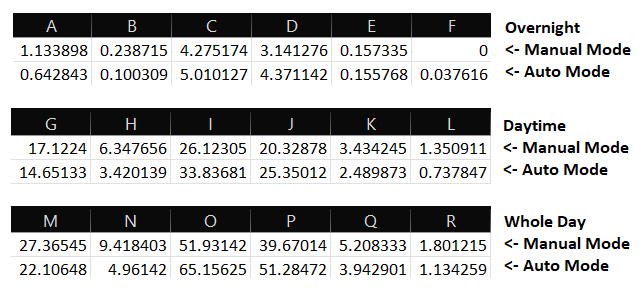